In [22]:
import pandas 
import math
from scipy import stats
import statsmodels.formula.api as smfa
import numpy as np
import matplotlib.pyplot as pl

In [23]:
def tstat(row1, row2):
    x1 = row1.sum()/len(row2)
    x2 = row2.sum()/len(row2)

    s1 = 0
    for el in row1:
        s1 += (el-x1)**2
    s1 /= len(row1)-1


    s2 = 0
    for el in row2:
        s2 += (el-x2)**2
    s2 /= len(row2)-1

    t = (x2-x1)/((s1/len(row1)+(s2/len(row2)))**(1/2))
    t = abs(t)
    
    o1 = math.sqrt(s1)
    o2 = math.sqrt(s2)
    
    print(f"M1 = {x1}")
    print(f"M2 = {x2}")
    print(f"omega1 = {o1}")
    print(f"omega2 = {o2}")
    
    return t

In [24]:
df = pandas.read_excel('dataset.xlsx')
# uncomment next line to get alternative dataset
# df = df[df['expconsole']-df['expdesktop'] < 2]
df

,tdesktop,tconsole,expdesktop,expconsole
0,348,335,2,3
1,587,919,1,2
2,450,993,2,1
3,452,921,2,3
4,456,440,2,3
5,863,613,2,2
6,978,858,1,3
7,420,840,2,2
8,832,1401,2,1
9,493,340,2,3


In [25]:
test = stats.ttest_ind(df['tdesktop'], df['tconsole'])
tstat(df['tdesktop'], df['tconsole'])

M1 = 552.5833333333334
M2 = 683.0833333333334
omega1 = 216.5395023098697
omega2 = 360.0092065321091


1.0760531414398307

In [26]:
trust = 0.05
kvant = stats.t.ppf(1-trust/2, len(df)*2-2)
t = abs(test.statistic)
p = test.pvalue
print(f"Уровень значимости = {trust}")
print(f"Квантиль распределения стьюдента = {kvant}")
print(f"t = {t}")
print("Нулевая гипотеза отвергается" if t > kvant else "Нулевая гипотеза принимается")
print()
print(f"Нулевая гипотеза отвергается на уровне значимости большем {p}")
print(f"Нулевая гипотеза принимается на уровне значимости меньшем {p}")#:.07f

Уровень значимости = 0.05
Квантиль распределения стьюдента = 2.0738730679040147
t = 1.0760531414398307
Нулевая гипотеза принимается

Нулевая гипотеза отвергается на уровне значимости большем 0.293562912282017
Нулевая гипотеза принимается на уровне значимости меньшем 0.293562912282017


In [27]:
desktop = sorted(df['tdesktop'])
console = sorted(df['tconsole'])
x = range(len(df['tdesktop']))

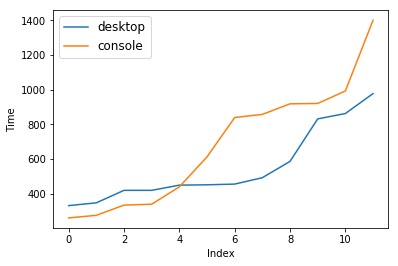

In [28]:
pl.plot(x, desktop, label = "desktop")
pl.plot(x, console, label = "console")
pl.legend(loc = 2, fontsize = 12)
pl.xlabel("Index")
pl.ylabel("Time")
pl.show()

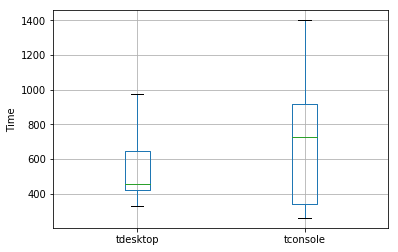

In [29]:
df.boxplot(column=['tdesktop', 'tconsole'])
pl.ylabel("Time")
pl.show()

In [30]:
df.corr()

,tdesktop,tconsole,expdesktop,expconsole
tdesktop,1.000000,0.519798,-0.090952,-0.299620
tconsole,0.519798,1.000000,0.214550,-0.757407
expdesktop,-0.090952,0.214550,1.000000,-0.310460
expconsole,-0.299620,-0.757407,-0.310460,1.000000
